# Environment Sanity Check #

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4, P4, or P100.

In [ ]:
!nvidia-smi

In [32]:
!pip install dask-ml

     |████████████████████████████████| 147 kB 8.5 MB/s 
     |████████████████████████████████| 23.2 MB 16.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


#Setup:
Set up script installs
1. Updates gcc in Colab
1. Installs Conda
1. Install RAPIDS' current stable version of its libraries, as well as some external libraries including:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuSignal
  1. BlazingSQL
  1. xgboost
1. Copy RAPIDS .so files into current working directory, a neccessary workaround for RAPIDS+Colab integration.


In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 291, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 291 (delta 66), reused 40 (delta 21), pack-reused 171
Receiving objects: 100% (291/291), 84.41 KiB | 9.38 MiB/s, done.
Resolving deltas: 100% (128/128), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [828 kB]
Get:12 http://arc

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:29
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.10


The following packages will be downloaded:

    package                

# cuDF and cuML Examples #

Now you can run code! 

What follows are basic examples where all processing takes place on the GPU.

#[cuDF](https://github.com/rapidsai/cudf)#

Load a dataset into a GPU memory resident DataFrame and perform a basic calculation.

Everything from CSV parsing to calculating tip percentage and computing a grouped average is done on the GPU.

In [ ]:
import cudf
import io, requests

# download CSV file from GitHub
url="https://github.com/plotly/datasets/raw/master/tips.csv"
content = requests.get(url).content.decode('utf-8')

# read CSV from memory
tips_df = cudf.read_csv(io.StringIO(content))
tips_df['tip_percentage'] = tips_df['tip']/tips_df['total_bill']*100

# display average tip by dining party size
print(tips_df.groupby('size').tip_percentage.mean())

size
6    15.622920
1    21.729202
4    14.594901
3    15.215685
2    16.571919
5    14.149549
Name: tip_percentage, dtype: float64


#[cuML](https://github.com/rapidsai/cuml)#

This snippet loads a 

As above, all calculations are performed on the GPU.

In [ ]:
import cuml

# Create and populate a GPU DataFrame
df_float = cudf.DataFrame()
df_float['0'] = [1.0, 2.0, 5.0]
df_float['1'] = [4.0, 2.0, 1.0]
df_float['2'] = [4.0, 2.0, 1.0]

# Setup and fit clusters
dbscan_float = cuml.DBSCAN(eps=1.0, min_samples=1)
dbscan_float.fit(df_float)

print(dbscan_float.labels_)

0    0
1    1
2    2
dtype: int32


# Example: XGBoost

In [ ]:
#!rm HIGGS.csv.gz

https://medium.com/rapids-ai/a-new-official-dask-api-for-xgboost-e8b10f3d1eb7

In [ ]:
#!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

In [ ]:
#!gunzip HIGGS.csv.gz

In [2]:
from dask.distributed import Client
import xgboost as xgb
from dask import dataframe as dd
import dask_cudf
from dask_cuda import LocalCUDACluster

### Training

In [ ]:
def main(client):
    # We use HIGGS as the dataset for demonstration.
    fname = 'HIGGS.csv'
    colnames = ['label'] + ['feature-%02d' % i for i in range(1, 29)]
    # By default dask dataframe uses pandas as data handling backend. Use dask cudf for acceleration
    dask_df = dask_cudf.read_csv(fname, header=None, names=colnames)
    y = dask_df['label']
    X = dask_df[dask_df.columns.difference(['label'])]
    # DaskDMatrix acts like normal DMatrix, works as a proxy for local
    # DMatrix scattered around the workers.
    dtrain = xgb.dask.DaskDMatrix(client, X, y)    # Use train method from xgboost.dask instead of xgboost.  This
    # distributed version of train returns a dictionary containing the
    # resulting booster and evaluation history obtained from
    # evaluation metrics.
    output = xgb.dask.train(client,
                            # Use GPU training algorithm
                            {'tree_method': 'gpu_hist'},
                            dtrain,
                            num_boost_round=100,
                            evals=[(dtrain, 'train')])
    booster = output['booster']  # booster is the trained model
    history = output['history']  # A dictionary containing evaluation results
    # Save the model to file
    booster.save_model('xgboost-model')
    print('Training evaluation history:', history)
    booster.set_param({'predictor': 'gpu_predictor'})
    # where X is a dask DataFrame or dask Array.
    prediction = xgb.dask.predict(client, booster, dtrain)

In [ ]:
if __name__ == '__main__':    # `LocalCUDACluster` is used for assigning GPU to XGBoost 
    # processes. Here `n_workers` represents the number of GPUs 
    # since we use one GPU per worker process.    
    with LocalCUDACluster() as cluster:
        with Client(cluster) as client:
            main(client)

/usr/local/lib/python3.7/site-packages/distributed/client.py:1123: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| numpy   | 1.19.5 | 1.19.5    | 1.21.2  |
| pandas  | 1.1.5  | 1.1.5     | 1.3.1   |
| tornado | 5.1.1  | 5.1.1     | 6.1     |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


[0]	train-rmse:0.47604
[1]	train-rmse:0.46219
[2]	train-rmse:0.45385
[3]	train-rmse:0.44736
[4]	train-rmse:0.44351
[5]	train-rmse:0.43993
[6]	train-rmse:0.43715
[7]	train-rmse:0.43528
[8]	train-rmse:0.43363
[9]	train-rmse:0.43221
[10]	train-rmse:0.43123
[11]	train-rmse:0.43043
[12]	train-rmse:0.42965
[13]	train-rmse:0.42910
[14]	train-rmse:0.42868
[15]	train-rmse:0.42776
[16]	train-rmse:0.42720
[17]	train-rmse:0.42668
[18]	train-rmse:0.42629
[19]	train-rmse:0.42595
[20]	train-rmse:0.42553
[21]	train-rmse:0.42530
[22]	train-rmse:0.42502
[23]	train-rmse:0.42481
[24]	train-rmse:0.42456
[25]	train-rmse:0.42421
[26]	train-rmse:0.42392
[27]	train-rmse:0.42373
[28]	train-rmse:0.42358
[29]	train-rmse:0.42339
[30]	train-rmse:0.42324
[31]	train-rmse:0.42307
[32]	train-rmse:0.42262
[33]	train-rmse:0.42239
[34]	train-rmse:0.42230
[35]	train-rmse:0.42212
[36]	train-rmse:0.42192
[37]	train-rmse:0.42185
[38]	train-rmse:0.42149
[39]	train-rmse:0.42135
[40]	train-rmse:0.42127
[41]	train-rmse:0.42122
[4

https://developer.nvidia.com/blog/accelerating-xgboost-on-gpu-clusters-with-dask/

In [3]:
import os
from time import time
from typing import Tuple

from dask import dataframe as dd
from dask_cuda import LocalCUDACluster
from distributed import Client, wait
import dask_cudf
from dask_ml.model_selection import train_test_split

import xgboost as xgb
from xgboost import dask as dxgb
import numpy as np
import argparse

In [16]:
def main(client):
    # We use HIGGS as the dataset for demonstration.
    parquet = to_parquet()
    X_train, X_valid, y_train, y_valid = load_higgs(parquet)
    booster = fit_model_customized_objective(client, X_train, y_train, X_valid, y_valid)
    preds = inplace_predict_multi_parts(client, booster, X_train, X_valid)
    print(preds)

In [4]:
def to_parquet() -> str:
   """Convert the HIGGS.csv file to parquet files."""
   dirpath = "./"
   parquet_path = os.path.join(dirpath, "HIGGS.parquet")
   if os.path.exists(parquet_path):
       return parquet_path
   csv_path = os.path.join(dirpath, "HIGGS.csv")
   colnames = ["label"] + ["feature-%02d" % i for i in range(1, 29)]
   df = dask_cudf.read_csv(csv_path, header=None, names=colnames, dtype=np.float32)
   df.to_parquet(parquet_path)
   return parquet_path

In [5]:
def load_higgs(
    path,
) -> Tuple[
    dask_cudf.DataFrame, dask_cudf.Series, dask_cudf.DataFrame, dask_cudf.Series
]:
    df = dask_cudf.read_parquet(path)

    y = df["label"]
    X = df[df.columns.difference(["label"])]

    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.33, random_state=42
    )
    X_train, X_valid, y_train, y_valid = client.persist(
        [X_train, X_valid, y_train, y_valid]
    )
    wait([X_train, X_valid, y_train, y_valid])

    return X_train, X_valid, y_train, y_valid

In [6]:
def fit_model_es(client, X, y, X_valid, y_valid) -> xgb.Booster:
   early_stopping_rounds = 5
   Xy = dxgb.DaskDeviceQuantileDMatrix(client, X, y)
   Xy_valid = dxgb.DaskDMatrix(client, X_valid, y_valid)
   # train the model
   booster = dxgb.train(
       client,
       {
           "objective": "binary:logistic",
           "eval_metric": "error",
           "tree_method": "gpu_hist",
       },
       Xy,
       evals=[(Xy_valid, "Valid")],
       num_boost_round=1000,
       early_stopping_rounds=early_stopping_rounds,
   )["booster"]
   return booster

In [7]:
def fit_model_customized_es(client, X, y, X_valid, y_valid):
    early_stopping_rounds = 5
    es = xgb.callback.EarlyStopping(rounds=early_stopping_rounds, save_best=True)
    Xy = dxgb.DaskDeviceQuantileDMatrix(client, X, y)
    Xy_valid = dxgb.DaskDMatrix(client, X_valid, y_valid)
    # train the model
    booster = xgb.dask.train(
        client,
        {
            "objective": "binary:logistic",
            "eval_metric": "error",
            "tree_method": "gpu_hist",
        },
        Xy,
        evals=[(Xy_valid, "Valid")],
        num_boost_round=1000,
        callbacks=[es],
    )["booster"]
    return booster

In [8]:
def fit_model_customized_objective(client, X, y, X_valid, y_valid) -> dxgb.Booster:
    def logit(predt: np.ndarray, Xy: xgb.DMatrix) -> Tuple[np.ndarray, np.ndarray]:
        predt = 1.0 / (1.0 + np.exp(-predt))
        labels = Xy.get_label()
        grad = predt - labels
        hess = predt * (1.0 - predt)
        return grad, hess

    def error(predt: np.ndarray, Xy: xgb.DMatrix) -> Tuple[str, float]:
        label = Xy.get_label()
        r = np.zeros(predt.shape)
        predt = 1.0 / (1.0 + np.exp(-predt))
        gt = predt > 0.5
        r[gt] = 1 - label[gt]
        le = predt <= 0.5
        r[le] = label[le]
        return "CustomErr", float(np.average(r))

    # Use early stopping with custom objective and metric.
    early_stopping_rounds = 5
    # Specify the metric we want to use for early stopping.
    es = xgb.callback.EarlyStopping(
    rounds=early_stopping_rounds, save_best=True, metric_name="CustomErr"
    )

    Xy = dxgb.DaskDeviceQuantileDMatrix(client, X, y)
    Xy_valid = dxgb.DaskDMatrix(client, X_valid, y_valid)
    booster = dxgb.train(
        client,
        {"eval_metric": "error", "tree_method": "gpu_hist"},
        Xy,
        evals=[(Xy_valid, "Valid")],
        num_boost_round=1000,
        obj=logit,  # pass the custom objective
        feval=error,  # pass the custom metric
        callbacks=[es],
    )["booster"]
    return booster

In [9]:
def explain(client, model, X):
   # Use array instead of dataframe in case of output dim is greater than 2.
   X_array = X.values
   contribs = dxgb.predict(
       client, model, X_array, pred_contribs=True, validate_features=False
   )
   # Use the result for further analysis
   return contribs

In [10]:
def predict(client, model, X):
    predt = dxgb.predict(client, model, X)
    assert isinstance(predt, dd.Series)
    return predt

In [11]:
def inplace_predict(client, model, X):
    # Use inplace_predict instead of standard predict.
    predt = dxgb.inplace_predict(client, model, X)
    assert isinstance(predt, dd.Series)
    return predt

In [12]:
def inplace_predict_multi_parts(client, model, X_train, X_valid):
    """Simulate the scenario that we need to run prediction on multiple datasets using train
	and valid. In real world the number of datasets is unlimited

    """
    # prescatter the model onto workers
    model_f = client.scatter(model)
    predictions = []
    for X in [X_train, X_valid]:
        # Use inplace_predict instead of standard predict.
        predt = dxgb.inplace_predict(client, model_f, X)
        assert isinstance(predt, dd.Series)
        predictions.append(predt)
        return predictions

In [17]:
if __name__ == "__main__":
   with LocalCUDACluster() as cluster:
       print("dashboard:", cluster.dashboard_link)
       with Client(cluster) as client:
           main(client)

dashboard: http://127.0.0.1:8787/status


/usr/local/lib/python3.7/site-packages/distributed/client.py:1123: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| numpy   | 1.19.5 | 1.19.5    | 1.21.2  |
| pandas  | 1.1.5  | 1.1.5     | 1.3.1   |
| tornado | 5.1.1  | 5.1.1     | 6.1     |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))
/usr/local/lib/python3.7/site-packages/dask_ml/model_selection/_split.py:469: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  category=FutureWarning,


[0]	Valid-error:0.34926	Valid-CustomErr:0.42169
[1]	Valid-error:0.33150	Valid-CustomErr:0.33793
[2]	Valid-error:0.33077	Valid-CustomErr:0.31170
[3]	Valid-error:0.32561	Valid-CustomErr:0.30167
[4]	Valid-error:0.32180	Valid-CustomErr:0.29675
[5]	Valid-error:0.31964	Valid-CustomErr:0.29361
[6]	Valid-error:0.31532	Valid-CustomErr:0.29037
[7]	Valid-error:0.31317	Valid-CustomErr:0.28797
[8]	Valid-error:0.30928	Valid-CustomErr:0.28575
[9]	Valid-error:0.30746	Valid-CustomErr:0.28413
[10]	Valid-error:0.30495	Valid-CustomErr:0.28285
[11]	Valid-error:0.30353	Valid-CustomErr:0.28169
[12]	Valid-error:0.30273	Valid-CustomErr:0.28099
[13]	Valid-error:0.30054	Valid-CustomErr:0.27953
[14]	Valid-error:0.29950	Valid-CustomErr:0.27862
[15]	Valid-error:0.29852	Valid-CustomErr:0.27775
[16]	Valid-error:0.29727	Valid-CustomErr:0.27686
[17]	Valid-error:0.29647	Valid-CustomErr:0.27624
[18]	Valid-error:0.29558	Valid-CustomErr:0.27552
[19]	Valid-error:0.29512	Valid-CustomErr:0.27523
[20]	Valid-error:0.29393	Valid

# Batch Prediction with PyTorch

In [18]:
%matplotlib inline

This example follows Torch's [transfer learning tutorial](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html). We will

1. Finetune a pretrained convolutional neural network on a specific task (ants vs. bees).
2. Use a Dask cluster for batch prediction with that model.

The primary focus is using a Dask cluster for batch prediction.

Note that the base environment on the examples.dask.org Binder does not include PyTorch
or torchvision. To run this example, you'll need to run

```
!conda install -y pytorch-cpu torchvision
```

which will take a bit of time to run.

## Download the data

The PyTorch documentation hosts a small set of data. We'll download and extract it locally.

In [19]:
import urllib.request
import zipfile

In [20]:
filename, _ = urllib.request.urlretrieve("https://download.pytorch.org/tutorial/hymenoptera_data.zip", "data.zip")
zipfile.ZipFile(filename).extractall()

The directory looks like

```
hymenoptera_data/
    train/
        ants/
            0013035.jpg
            ...
            1030023514_aad5c608f9.jpg
        bees/
            1092977343_cb42b38d62.jpg
            ...
            2486729079_62df0920be.jpg
     
    train/
        ants/
            0013025.jpg
            ...
            1030023514_aad5c606d9.jpg
        bees/
            1092977343_cb42b38e62.jpg
            ...
            2486729079_62df0921be.jpg
  
```

Following the [tutorial](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html), we'll finetune the model.

In [23]:
!git clone https://github.com/dask/dask-examples

Cloning into 'dask-examples'...
remote: Enumerating objects: 7417, done.
remote: Counting objects: 100% (895/895), done.
remote: Compressing objects: 100% (468/468), done.
remote: Total 7417 (delta 508), reused 723 (delta 421), pack-reused 6522
Receiving objects: 100% (7417/7417), 497.50 MiB | 27.56 MiB/s, done.
Resolving deltas: 100% (4882/4882), done.


In [32]:
import sys
sys.path.append(r'/content/dask-examples/machine-learning/')

In [33]:
import torchvision
from tutorial_helper import (imshow, train_model, visualize_model, dataloaders, class_names, finetune_model)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Finetune the model

Our base model is resnet18. It predicts for 1,000 categories, while ours just predicts 2 (ants or bees). To make this model train quickly on examples.dask.org, we'll only use a couple of epochs.

In [34]:
import dask

In [35]:
%%time
model = finetune_model()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 0/1
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.5694 Acc: 0.7131
val Loss: 0.2326 Acc: 0.9412

Epoch 1/1
----------
train Loss: 0.4257 Acc: 0.7951
val Loss: 0.2058 Acc: 0.9412

Training complete in 0m 9s
Best val Acc: 0.941176
CPU times: user 5.12 s, sys: 3.16 s, total: 8.28 s
Wall time: 19.9 s


Things seem OK on a few random images:

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70319b9ad0>,
      dtype=object)

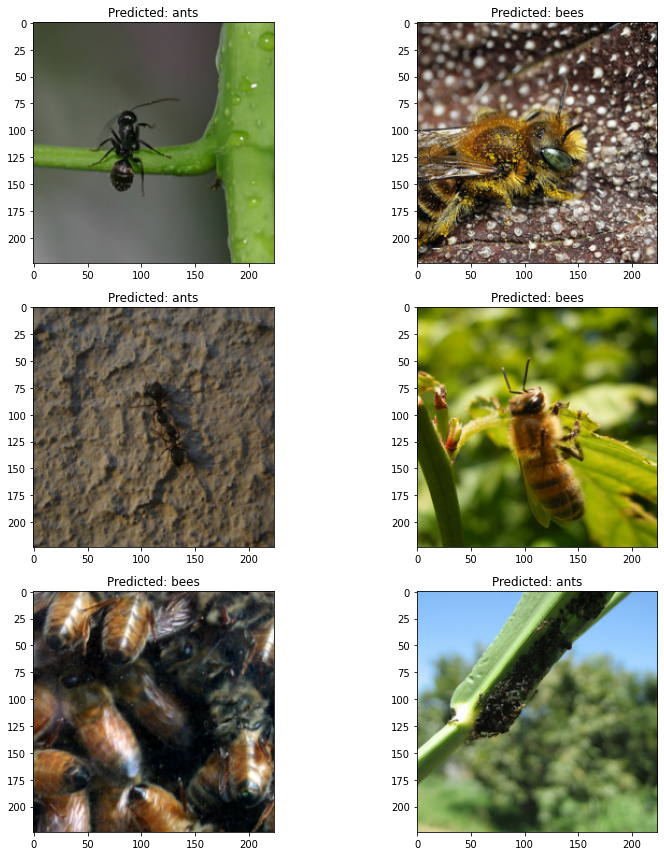

In [36]:
visualize_model(model)

## Batch Prediction with Dask

Now for the main topic: using a pretrained model for batch prediction on a Dask cluster.
There are two main complications, that both deal with minimizing the amount of data
moved around:

1. **Loading the data on the workers.**. We'll use `dask.delayed` to load the data on
   the workers, rather than loading it on the client and sending it to the workers.
2. **PyTorch neural networks are large.** We don't want them in Dask task graphs, and we
   only want to move them around once.

In [37]:
from distributed import Client

client = Client(n_workers=2, threads_per_worker=2)
client

/usr/local/lib/python3.7/site-packages/distributed/client.py:1123: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| numpy   | 1.19.5 | 1.19.5    | 1.21.2  |
| pandas  | 1.1.5  | 1.1.5     | 1.3.1   |
| tornado | 5.1.1  | 5.1.1     | 6.1     |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 4,Total memory: 12.69 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45427,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 12.69 GiB
Comm: tcp://172.28.0.2:37209,Total threads: 2
Dashboard: http://172.28.0.2:33567/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:35865,


### Loading the data on the workers

First, we'll define a couple helpers to load the data and preprocess it for the neural network.
We'll use `dask.delayed` here so that the execuation is lazy and happens on the cluster.
See [the delayed example](../delayed.ipynb) for more on using `dask.delayed`.

In [38]:
import glob
import toolz
import dask
import dask.array as da
import torch
from torchvision import transforms
from PIL import Image


@dask.delayed
def load(path, fs=__builtins__):
    with fs.open(path, 'rb') as f:
        img = Image.open(f).convert("RGB")
        return img


@dask.delayed
def transform(img):
    trn = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return trn(img)

In [39]:
objs = [load(x) for x in glob.glob("hymenoptera_data/val/*/*.jpg")]

To load the data from cloud storage, say Amazon S3, you would use

```python
import s3fs

fs = s3fs.S3FileSystem(...)
objs = [load(x, fs=fs) for x in fs.glob(...)]
```

The PyTorch model expects tensors of a specific shape, so let's
transform them.

In [40]:
tensors = [transform(x) for x in objs]

And the model expects batches of inputs, so let's stack a few together.

In [41]:
batches = [dask.delayed(torch.stack)(batch)
           for batch in toolz.partition_all(10, tensors)]
batches[:5]

[Delayed('stack-02314ff9-78db-4bfb-9fc0-f8aca8d0a1b2'),
 Delayed('stack-390d8dc4-c075-4c2a-a233-0589544d9c2c'),
 Delayed('stack-a8bd6385-7e36-4e78-bc09-4a3d10a48e11'),
 Delayed('stack-31bb6406-9f89-43d9-8b10-04d699d0f488'),
 Delayed('stack-a4832488-7940-4ef5-b7e6-a24765db55c5')]

Finally, we'll write a small `predict` helper to predict the output class (0 or 1).

In [42]:
@dask.delayed
def predict(batch, model):
    with torch.no_grad():
        out = model(batch)
        _, predicted = torch.max(out, 1)
        predicted = predicted.numpy()
    return predicted

### Moving the model around

PyTorch neural networks are large, so we don't want to repeat it many times in our task graph (once per batch).

In [43]:
import pickle

dask.utils.format_bytes(len(pickle.dumps(model)))

'42.73 MiB'

Instead, we'll also wrap the model itself in `dask.delayed`. This means the model only shows up once in the Dask graph.

Additionally, since we performed fine-tuning in the above (and that runs on a GPU if its available), we should move the model back to the CPU.

In [44]:
dmodel = dask.delayed(model.cpu()) # ensuring model is on the CPU

Now we'll use the (delayed) `predict` method to get our predictions.

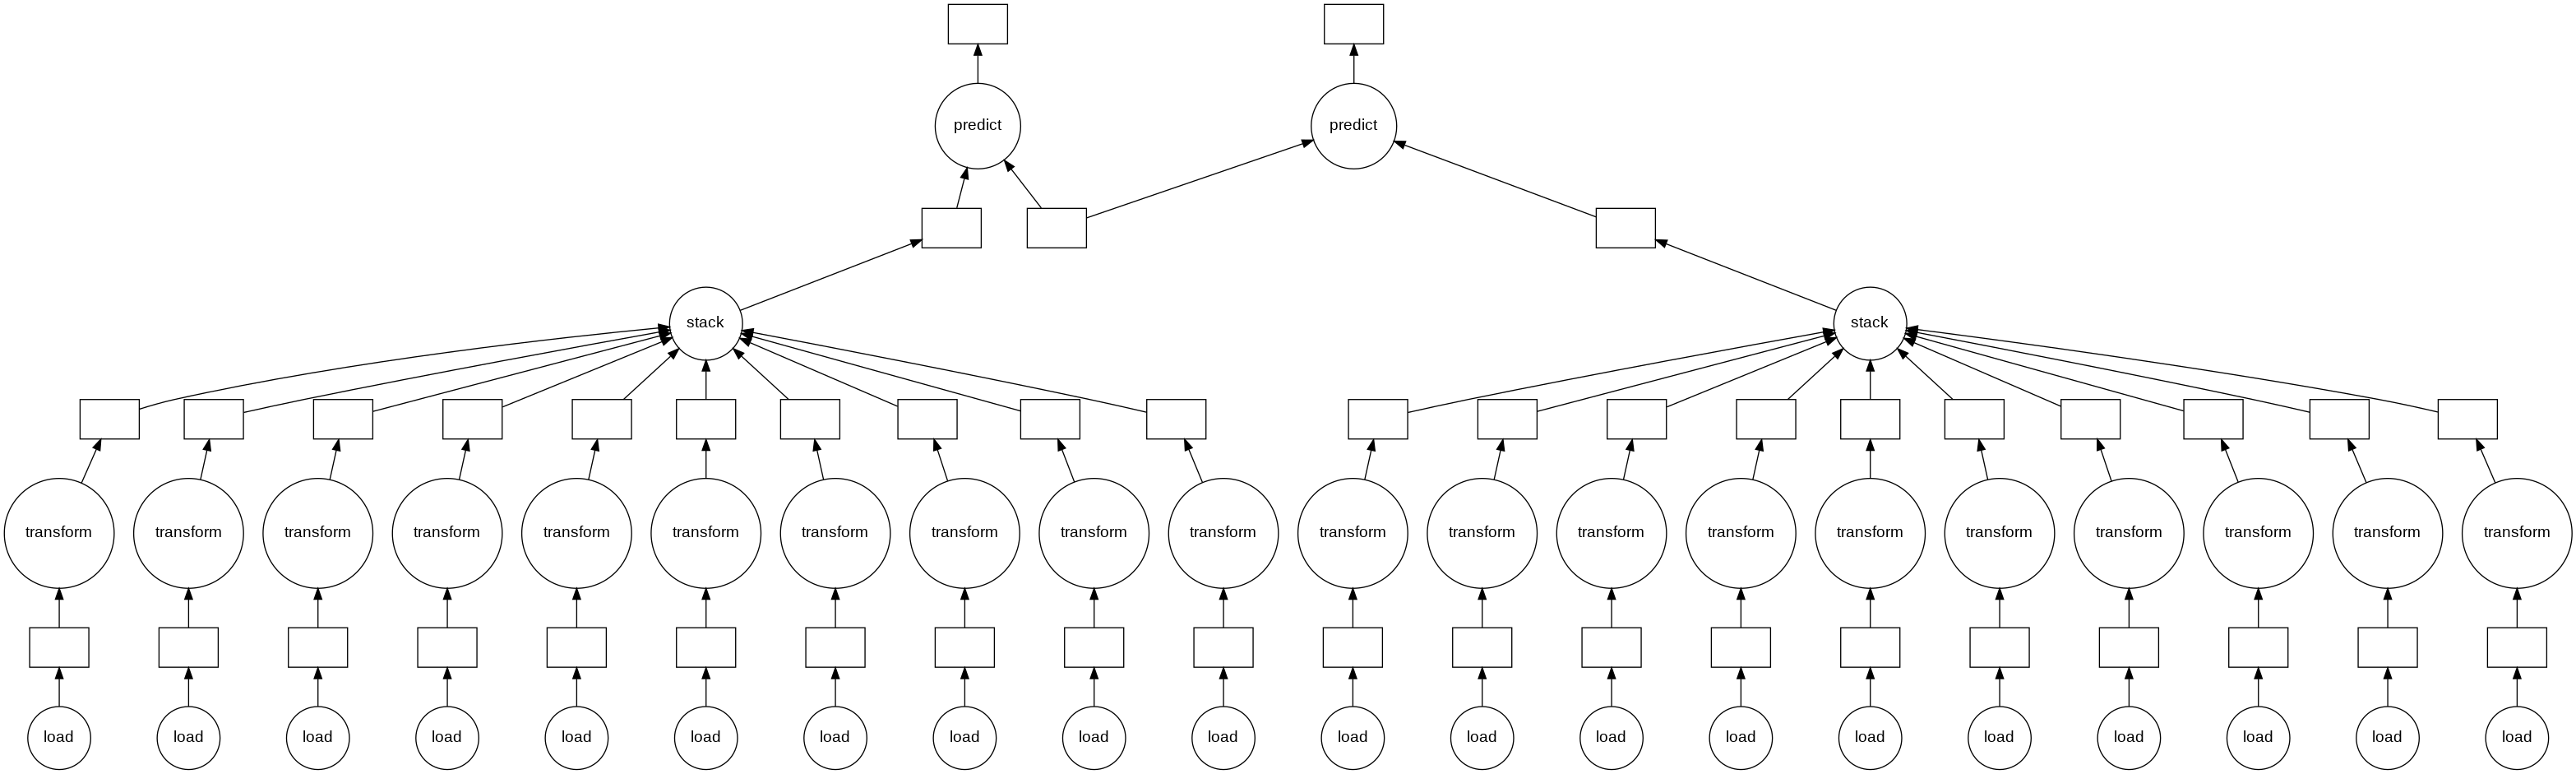

In [45]:
predictions = [predict(batch, dmodel) for batch in batches]
dask.visualize(predictions[:2])

The visualization is a bit messy, but the large PyTorch model is the box that's an ancestor of both `predict` tasks.

Now, we can do the computation, using the Dask cluster to do all the work. Because the dataset we're working with is small, it's safe to just use `dask.compute` to bring the results back to the local Client. For a larger dataset you would want to write to disk or cloud storage or continue processing the predictions on the cluster.

In [46]:
predictions = dask.compute(*predictions)
predictions

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1]),
 array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0]))

## Summary

This example showed how to do batch prediction on a set of images using PyTorch and Dask.
We were careful to load data remotely on the cluster, and to serialize the large neural network only once.